In [74]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from scipy import stats
import os
import json
import pandas as pd

In [54]:
total_norm = {}
total_gennormalization = {}

In [44]:
def load_data(file_name, branches, process,treedir,selection='',entrystop=None,):

    root_file = uproot.open(file_name)
    df = root_file[treedir+process].pandas.df(branches, entrystop=entrystop).dropna()
    if selection!='' :
        print 'applying ',selection
        df = df.query(selection)
    print("Entries in ntuple:")
    print(len(df))
    return df

In [67]:
year='2018'

process_NLO = 'hh%s_13TeV_125_13TeV_DoubleHTag_0'%year
file_NLO = '/work/nchernya/HHbbgg_ETH_devel/root_files/ntuples_nlo_07042020/output_hh_nlo_cHHH1_%s.root'%year
#features = ['genMhh','MX','weight','HHbbggMVA']
features = ['diHiggs_pt','diHiggs_mass','genMhh','MX','dijet_pt','dijet_eta','diphoton_pt','diphoton_eta','weight',
            'CMS_hgg_mass','leadingJet_DeepFlavour','subleadingJet_DeepFlavour',
            'absCosThetaStar_CS','absCosTheta_bb','absCosTheta_gg','customLeadingPhotonIDMVA',
            'customSubLeadingPhotonIDMVA','leadingPhotonSigOverE','subleadingPhotonSigOverE',
            'sigmaMOverM','leadingPhoton_pt','leadingPhoton_eta',
            'subleadingPhoton_pt','subleadingPhoton_eta',
            'leadingJet_pt','leadingJet_eta','subleadingJet_eta','subleadingJet_pt']
tmp = file_NLO.split('/')
out_dir = tmp[-1].replace('.root','')
df_NLO = load_data(file_NLO, features+['genweight'], process_NLO,'tagsDumper/trees/','abs(genweight)<0.1')
#features += ['benchmark_reweight_SM','MVAOutputTransformed']
features += ['benchmark_reweight_SM']
process_LO = 'hh%s_13TeV_125_13TeV_DoubleHTag_0'%year
file_LO = '/scratch/nchernya/HHbbgg/18_02_2020/output_hh_%s_gen.root'%year
#df_LO=load_data(file_LO,features,process_LO,'')
df_LO=load_data(file_LO,features,process_LO,'tagsDumper/trees/')
print out_dir

applying  abs(genweight)<0.1
Entries in ntuple:
65753
Entries in ntuple:
1500287
output_hh_nlo_cHHH1_2018


diHiggs_pt
reducing binning


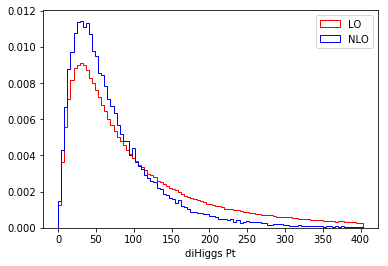

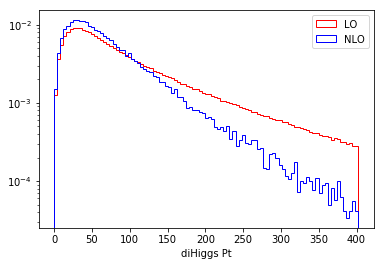

diHiggs_mass
reducing binning


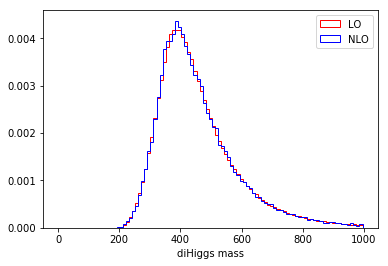

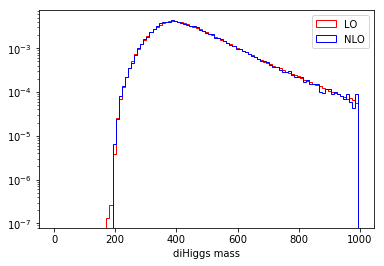

genMhh
reducing binning


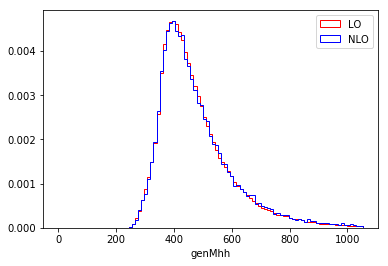

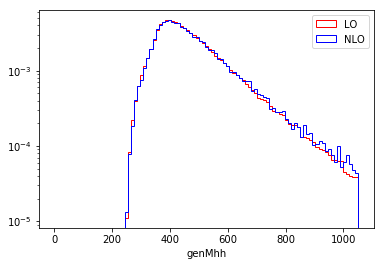

MX
reducing binning


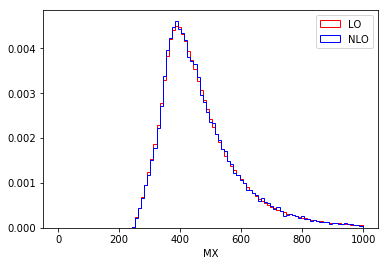

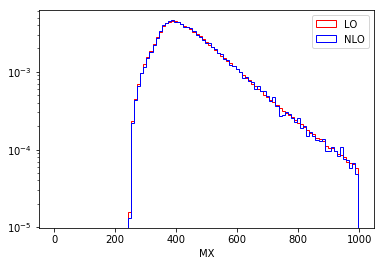

dijet_pt
reducing binning


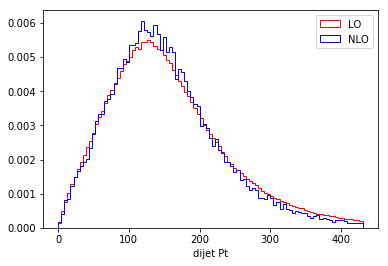

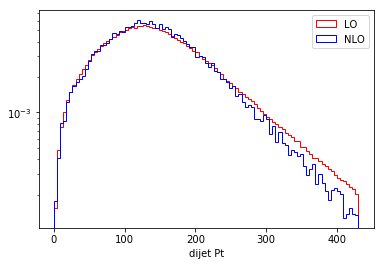

dijet_eta


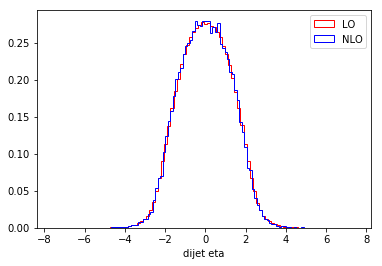

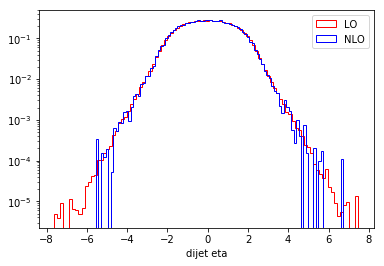

diphoton_pt
reducing binning


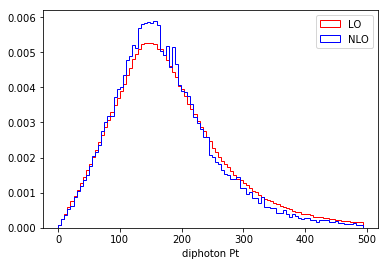

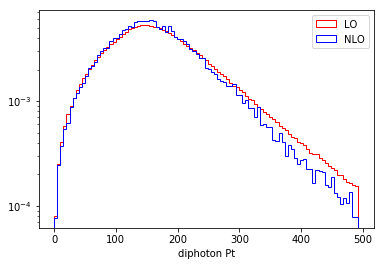

diphoton_eta


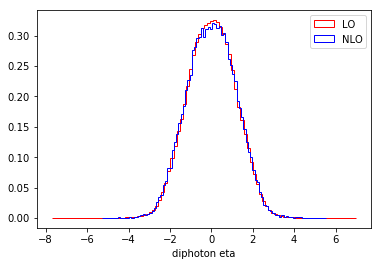

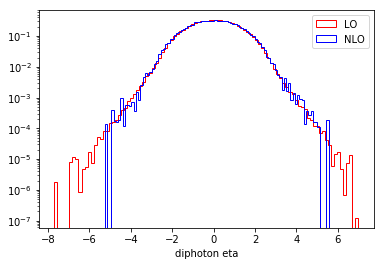

CMS_hgg_mass


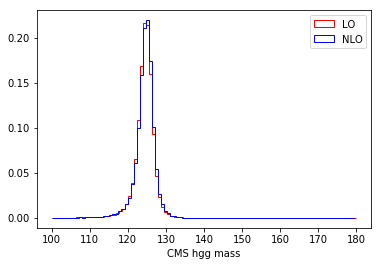

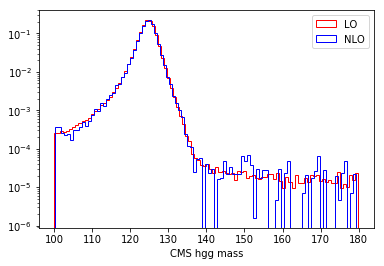

leadingJet_DeepFlavour


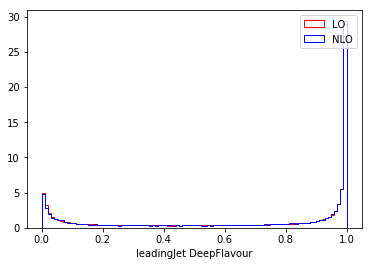

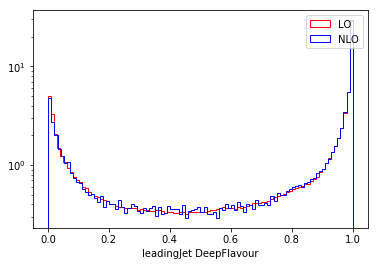

subleadingJet_DeepFlavour


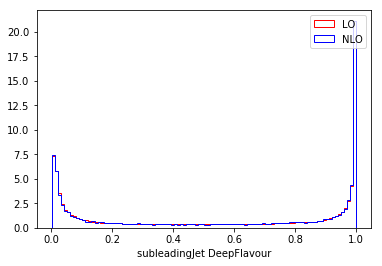

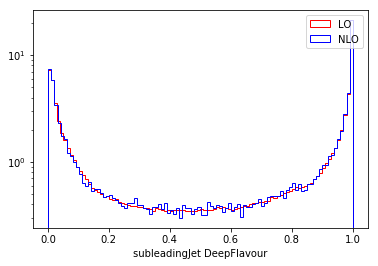

absCosThetaStar_CS


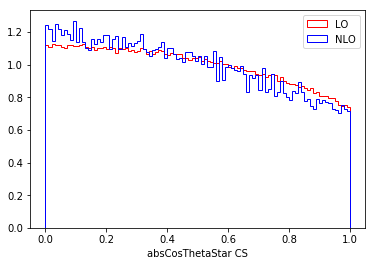

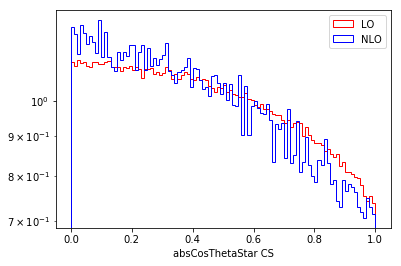

absCosTheta_bb


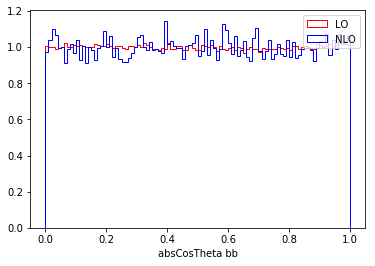

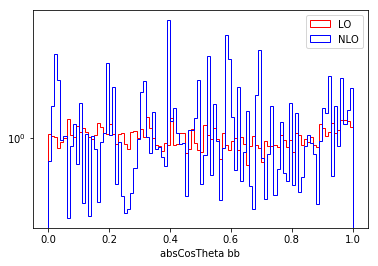

absCosTheta_gg


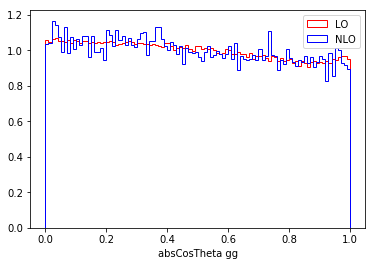

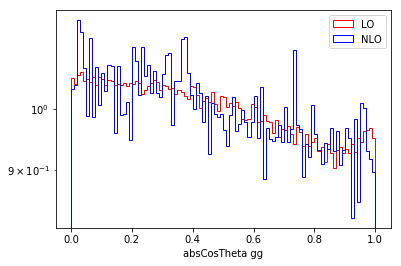

customLeadingPhotonIDMVA
reducing binning


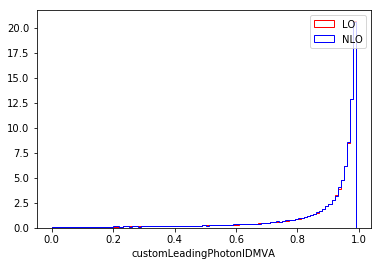

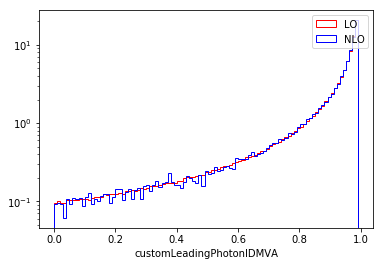

customSubLeadingPhotonIDMVA
reducing binning


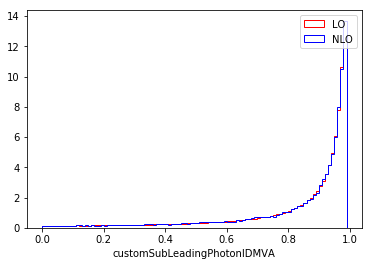

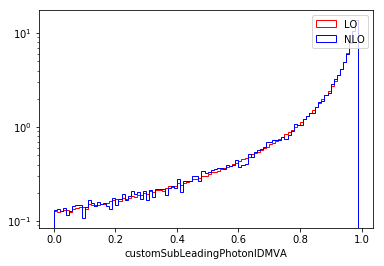

leadingPhotonSigOverE
reducing binning


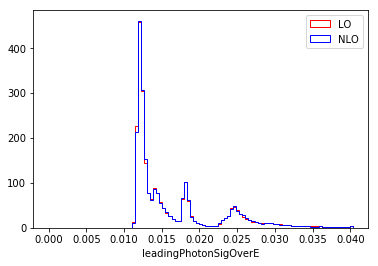

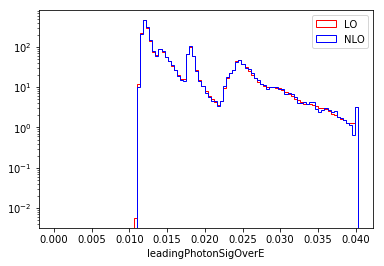

subleadingPhotonSigOverE
reducing binning


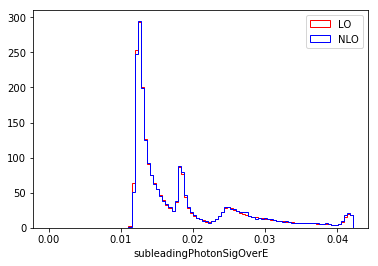

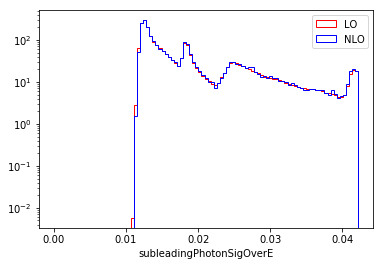

sigmaMOverM
reducing binning


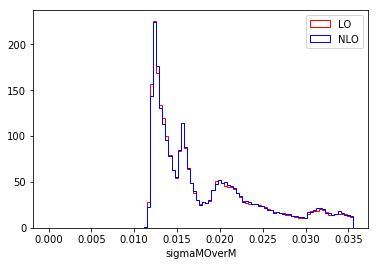

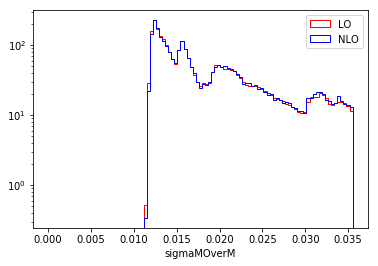

leadingPhoton_pt
reducing binning


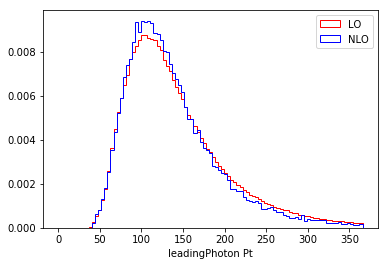

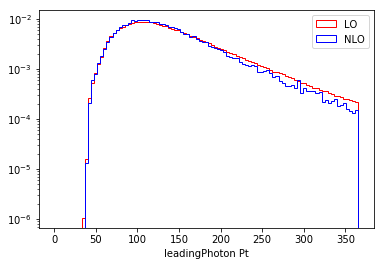

leadingPhoton_eta


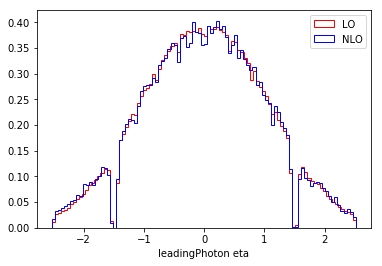

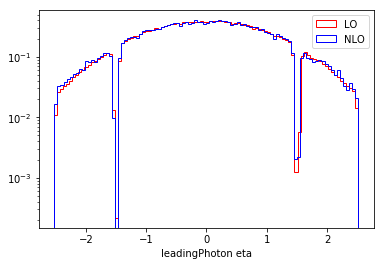

subleadingPhoton_pt
reducing binning


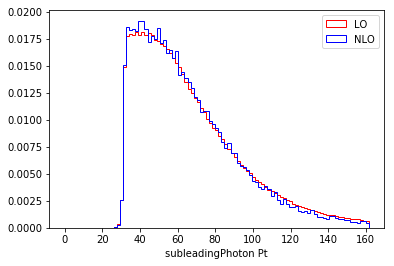

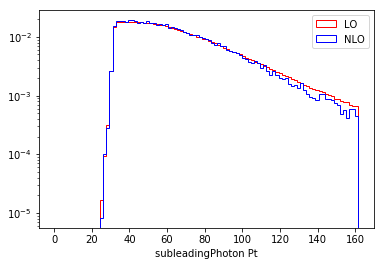

subleadingPhoton_eta


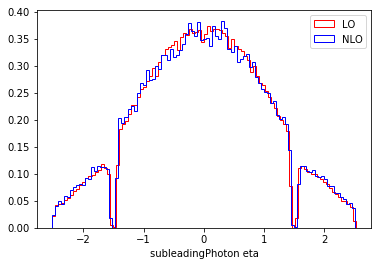

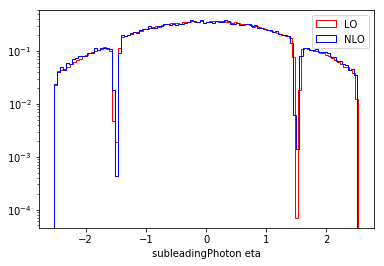

leadingJet_pt
reducing binning


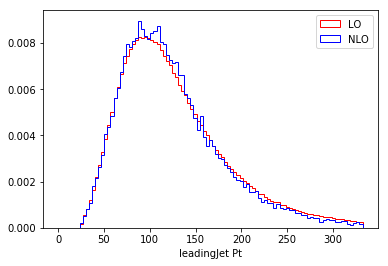

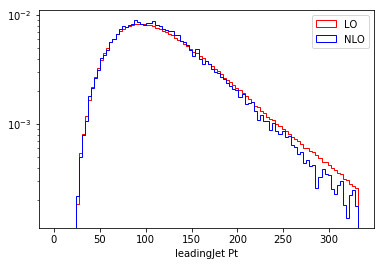

leadingJet_eta


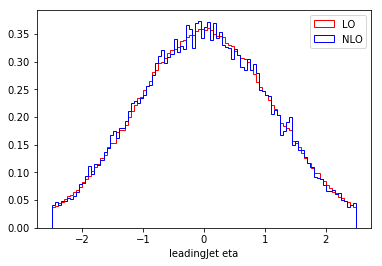

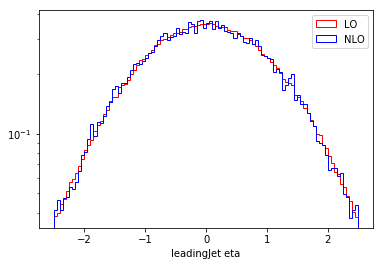

subleadingJet_eta


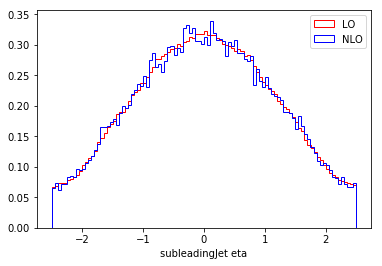

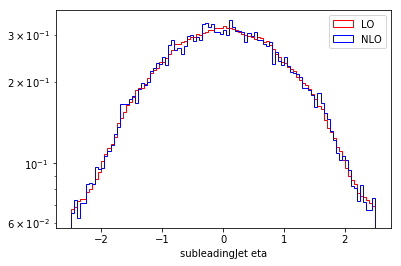

subleadingJet_pt
reducing binning


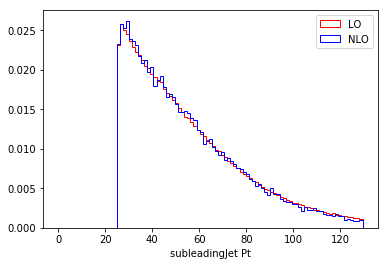

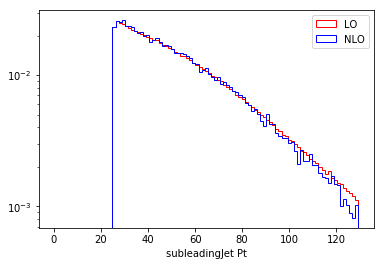

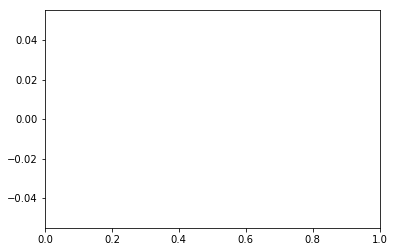

In [68]:
#plotting routine
numbins=100
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for feat in features:
    if 'weight' in feat: 
        continue
    if 'MVAOutputTransformed' in feat: 
        continue
    print feat 
    #set the same range
    if ('pt' in feat or 'mass' in feat or 'M' in feat or 'SigOverE' in feat) and (feat not in 'CMS_hgg_mass'):
        print "reducing binning"
        nbins = np.linspace(0.0, np.quantile(df_LO[feat],0.95) , numbins)
    else:
        nbins = numbins
    #val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_LO[feat],label='LO',histtype='step',bins=nbins,color='red',density='True',weights=df_LO['weight']*df_LO['benchmark_reweight_SM'])
    if 'HHbbggMVA' in feat : val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_LO['MVAOutputTransformed'],label='LO',histtype='step',bins=nbins,color='red',density='True',weights=df_LO['weight']*df_LO['benchmark_reweight_SM'])
    else :  val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_LO[feat],label='LO',histtype='step',bins=nbins,color='red',density='True',weights=df_LO['weight']*df_LO['benchmark_reweight_SM'])
    val_of_bins_x2, edges_of_bins_x2, patches_x2 = plt.hist(df_NLO[feat],label='NLO',histtype='step',bins=nbins,color='blue',density='True',weights=df_NLO['weight'])
    plt.legend(loc="upper right")

    plt.xlabel(feat.replace('_',' ').replace('pt','Pt'))
    plt.savefig(os.path.join(out_dir, str(feat)+".png"))
    plt.show()
    
    plt.yscale('log')
    if 'HHbbggMVA' in feat : val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_LO['MVAOutputTransformed'],label='LO',histtype='step',bins=nbins,color='red',density='True',weights=df_LO['weight']*df_LO['benchmark_reweight_SM'])
    else : val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_LO[feat],label='LO',histtype='step',bins=nbins,color='red',density='True',weights=df_LO['weight']*df_LO['benchmark_reweight_SM'])    
    #val_of_bins_x1, edges_of_bins_x1, patches_x1  = plt.hist(df_LO[feat],label='LO',histtype='step',bins=nbins,color='red',density='True',weights=df_LO['weight']*df_LO['benchmark_reweight_SM'])
    val_of_bins_x2, edges_of_bins_x2, patches_x2 = plt.hist(df_NLO[feat],label='NLO',histtype='step',bins=nbins,color='blue',density='True',weights=df_NLO['weight'])
    plt.xlabel(feat.replace('_',' ').replace('pt','Pt'))
    plt.legend(loc="upper right")
    plt.savefig(os.path.join(out_dir, str(feat)+"_log.png"))

    plt.show()
    plt.yscale('linear')


In [69]:
print("fraction of negative weights:"+str(np.count_nonzero(df_NLO["weight"]<0)/float(len(df_NLO))*100)+"%")

fraction of negative weights:5.84155856007%


In [70]:
renorm_file = open('/work/nchernya/DiHiggs/inputs/20_12_2019/reweighting_normalization_18_12_2019.json').read()
normalizations_json = json.loads(renorm_file)

In [71]:
powheg_nlo_xsec = 0.02675

total_norm[year] = {}
total_norm[year]['LO'] = sum(df_LO["weight"]*df_LO["benchmark_reweight_SM"]/normalizations_json[year]['benchmark_SM_normalization'])
total_norm[year]['NLO'] = sum(df_NLO["weight"])/powheg_nlo_xsec

In [73]:
print total_norm
#print year, 'ratio NLO/LO = %.3f'%(total_norm[year]['NLO']/total_norm[year]['LO'])
for y in ['2016','2017','2018']:
    print y, 'ratio NLO/LO = %.3f'%(total_norm[y]['NLO']/total_norm[y]['LO'])


{'2017': {'LO': 0.36817129891580075, 'NLO': 0.33676419177892924}, '2016': {'LO': 0.38476565635043974, 'NLO': 0.33540270463109123}, '2018': {'LO': 0.3769882554873395, 'NLO': 0.32999996784565394}}
2016 ratio NLO/LO = 0.872
2017 ratio NLO/LO = 0.915
2018 ratio NLO/LO = 0.875


In [105]:
###Check the total normalization :

year='2018'

process_NLO = 'hh%s_13TeV_125_13TeV_DoubleHTag_0'%year
process_NLO_noTag = 'hh%s_13TeV_125_13TeV_NoTag_0'%year
file_NLO = '/work/nchernya/HHbbgg_ETH_devel/root_files/ntuples_nlo_07042020/output_hh_nlo_cHHH1_%s.root'%year
weights = ['weight','genweight']
tmp = file_NLO.split('/')
out_dir = tmp[-1].replace('.root','')
df_NLO_selected = load_data(file_NLO,weights, process_NLO,'genDiphotonDumper/trees/')
df_NLO_no_tag = load_data(file_NLO, weights, process_NLO_noTag,'genDiphotonDumper/trees/')

Entries in ntuple:
65754
Entries in ntuple:
131646


In [106]:
df_NLO_total = pd.concat([df_NLO_selected, df_NLO_no_tag])

In [107]:
total_gennormalization[year] = {}
total_gennormalization[year]['crazy_weights'] = sum(df_NLO_total['weight'])
total_gennormalization[year]['cleaned_weights'] = sum(df_NLO_total.query('abs(genweight)<0.1')['weight'])

In [108]:
for y in ['2016','2017','2018']:
    print y, 'ratio cleanedWeight/crazyWeight = %.3f'%(total_gennormalization[y]['cleaned_weights']/total_gennormalization[y]['crazy_weights'])
    

2016 ratio cleanedWeight/crazyWeight = 0.997
2017 ratio cleanedWeight/crazyWeight = 1.001
2018 ratio cleanedWeight/crazyWeight = 0.974
